# Plots for fragment analysis data exported with fragman in R studio

In [1]:
# External libraries
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *
import os

plt.style.use('dark_background')

In [6]:
def formatPeaks(figH, axH, plotname):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=6)
    fontLabels = font_manager.FontProperties(fname=font_path, size=9)
    fontTitle = font_manager.FontProperties(fname=font_path, size=9)
    
    axH.set_xlabel('size (bp)', fontproperties=fontLabels)
    axH.set_ylabel('fluo (au)', fontproperties=fontLabels)

    axH.set_title(plotname, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    axH.yaxis.set_label_coords(-.14,.5)
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    
def plotABIcsv(dirPath, fileName, gene):
    fH, axH = plt.subplots(figsize=[4,2])
    fH.subplots_adjust(left=0.16, bottom=0.2, wspace=0.1)

    lim1, lim2 = getLims(gene)
    ilim1 = np.searchsorted(gdf['size'],lim1)
    ilim2 = np.searchsorted(gdf['size'],lim2)
    pH = axH.plot(gdf['size'][ilim1:ilim2],gdf['fluo'][ilim1:ilim2], color='#4669F2', zorder = 1)
    formatPeaks(fH, axH,fileName)
    return fH, axH
    
def formatPeaks_withladder(figH, axH1, axH2, plotname):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=14)
    fontLabels = font_manager.FontProperties(fname=font_path, size=18)
    fontTitle = font_manager.FontProperties(fname=font_path, size=18)
    
    axH2.set_xlabel('size (bp)', fontproperties=fontLabels)
    axH1.set_ylabel('fluo (au)', fontproperties=fontLabels)
    axH2.set_ylabel('fluo (au)', fontproperties=fontLabels)

    axH1.set_title(plotname, fontproperties=fontTitle)
    axH1.get_xaxis().set_visible(False)
    axH1.spines['bottom'].set_visible(False)
    axH1.spines['top'].set_visible(False)
    axH1.spines['right'].set_visible(False)
    axH2.spines['top'].set_visible(False)
    axH2.spines['right'].set_visible(False)

    for label in (axH1.get_xticklabels() + axH1.get_yticklabels()+ axH2.get_xticklabels() + axH2.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    
    figH.align_ylabels()

def plotABIcsv_withladder(dirPath, fileName, gene):
    fH = plt.figure(constrained_layout=True, figsize=[8,4])
    gs = fH.add_gridspec(12, 1)
    ax1 = fH.add_subplot(gs[0:3, 0])
    ax2 = fH.add_subplot(gs[4:, 0], sharex = ax1)
    
    lim1, lim2 = getLims(gene)
    ilim1 = np.searchsorted(gdf['size'],lim1)
    ilim2 = np.searchsorted(gdf['size'],lim2)
    pH = ax1.plot(gdf['size'][ilim1:ilim2],gdf['ladder'][ilim1:ilim2], color='#CC2C2A', zorder = 1)
    pH = ax2.plot(gdf['size'][ilim1:ilim2],gdf['fluo'][ilim1:ilim2], color='#4669F2', zorder = 1)
    formatPeaks(fH, ax1,ax2,fileName)
    return fH, [ax1,ax2]

def getLims(gene):
    if gene == 'eml1': lim1 = 150; lim2 = 300;
    elif gene == 'sema7a': lim1 = 250; lim2 = 450;
    elif gene == 'gnat2': lim1 = 200; lim2 = 350;
    elif gene == 'syt5a': lim1 = 400; lim2 = 550;
    elif gene == 'efna1b': lim1 = 400; lim2 = 550;
    elif gene == 'tbx2a': lim1 = 380; lim2 = 580;
#     elif gene == 'tbx2a': lim1 = 450; lim2 = 600;
#     elif gene == 'tbx2b': lim1 = 250; lim2 = 400;
    elif gene == 'tbx2b': lim1 = 280; lim2 = 380;
#     elif gene == 'ntng2b': lim1 = 100; lim2 = 300;
    elif gene == 'ntng2b': lim1 = 200; lim2 = 300;
    elif gene == 'empty': lim1 = 100; lim2 = 600;
    else: lim1 = 100; lim2 = 600;
    return lim1, lim2


def plotABIfig(dirPath, fileName, gene):
    fH, axH = plt.subplots(figsize=[11,8])
    fH.subplots_adjust(left=0.16, bottom=0.2, wspace=0.1)

    lim1, lim2 = getLims(gene)
    ilim1 = np.searchsorted(gdf['size'],lim1)
    ilim2 = np.searchsorted(gdf['size'],lim2)
    pH = axH.plot(gdf['size'][ilim1:ilim2],gdf['fluo'][ilim1:ilim2]/100, color='#4669F2', zorder = 1, linewidth=4)
#     formatPeaksFig(fH, axH,filename)
    formatPeaksFig(fH, axH,'')
    return fH, axH

def formatPeaksFig(figH, axH, plotname):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=50)
    fontLabels = font_manager.FontProperties(fname=font_path, size=50)
    fontTitle = font_manager.FontProperties(fname=font_path, size=24)
    
    axH.set_xlabel('size (bp)', fontproperties=fontLabels)
    axH.set_ylabel('x 10$^2$ fluo (au)', fontproperties=fontLabels)
    
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=2)
    axH.set_title(plotname, fontproperties=fontTitle)
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    axH.spines['bottom'].set_linewidth(4)
    axH.spines['left'].set_linewidth(4)
    axH.yaxis.set_label_coords(-.12,.48)
    axH.xaxis.set_tick_params(width=3, length=10)
    axH.yaxis.set_tick_params(width=3, length=10)
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)

print('defs ready!')

defs ready!


In [ ]:
dPath = "/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/20210203_fragAnalysis_sema7a_tbx2/tbx2b/" #directory path
%cd $dPath
gene = 'tbx2b'

In [ ]:
# fPath = "sema7a.wt01_H06" #file path
# fPath = "sema7a.05_E06" #file path
# fPath = "sema7a.06_F06" #file path

fPath = "20201113_CRtbx2b_tbx2b_i08" #file path
gdf = pd.read_csv(dPath + fPath + '.csv')
fH, axH= plotABIfig(dPath, fPath, gene) # For panel in paper figure
# fH, axH= plotABIcsv(dPath, fPath, gene) # miniplot for markdown summary file
# fH.savefig("./{0}.svg".format(fPath[:-4]), transparent=True, format="svg")
# fH.savefig("/Users/angueyraaristjm/Documents/LiImaging/zfExports/20201113_CRtbx2b/fragmentAnalysis/{0}.svg".format(fPath), transparent=False, format="svg")
# fH, [ax1, ax2] = plotABIcsv_withladder(dPath, fPath[:-8], gene)

#### Loop through folder and save all plots

/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/20210407_tbx2aF1s/tbx2a


/Users/angueyraaristjm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


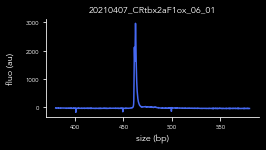

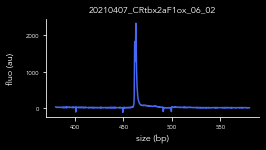

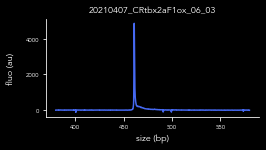

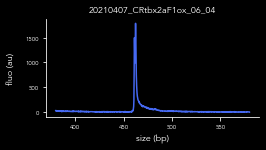

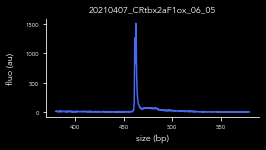

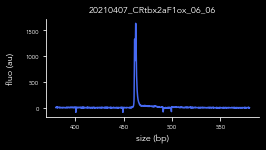

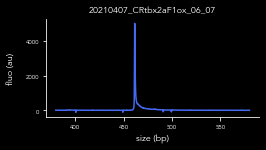

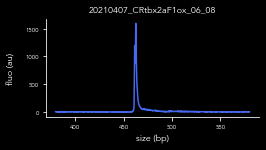

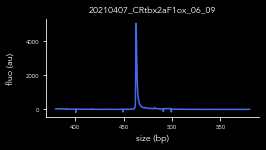

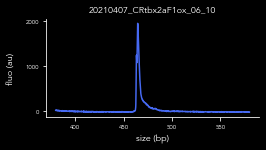

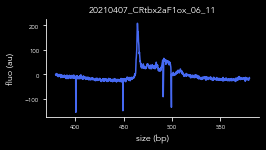

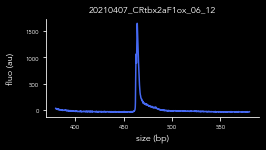

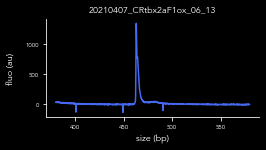

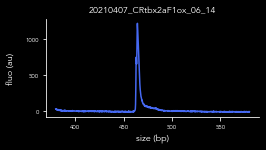

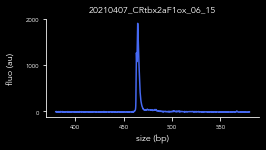

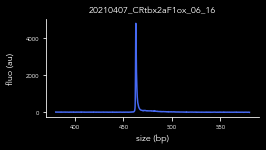

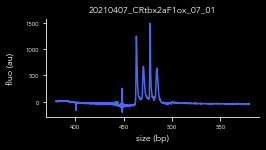

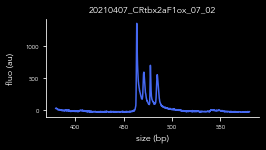

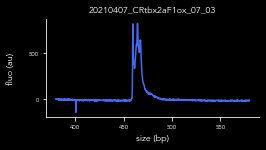

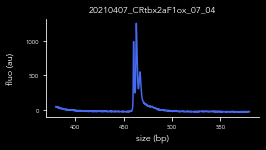

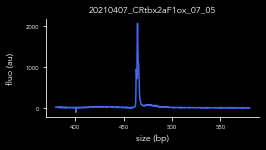

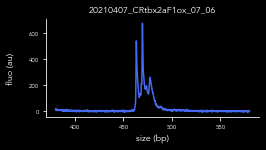

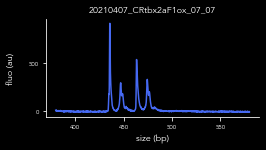

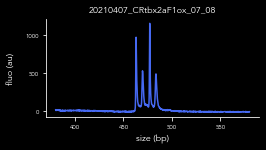

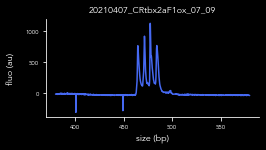

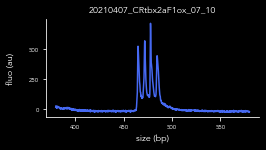

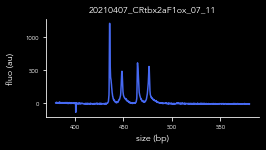

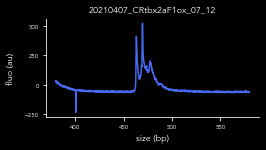

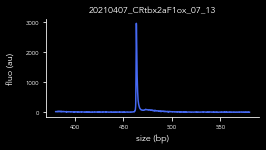

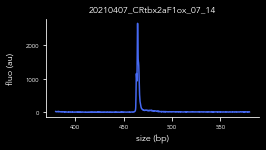

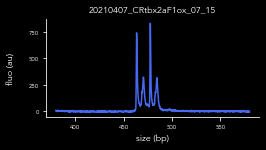

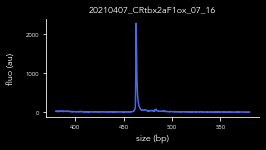

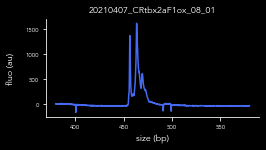

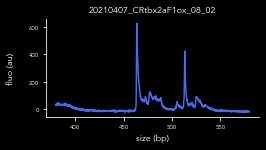

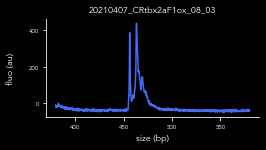

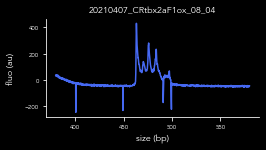

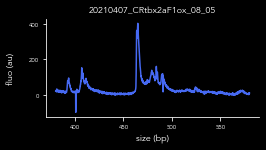

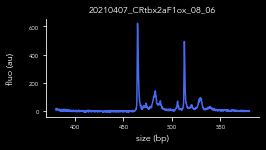

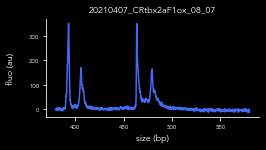

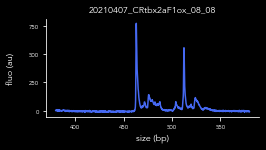

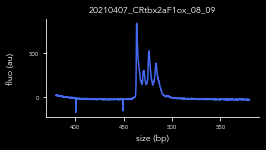

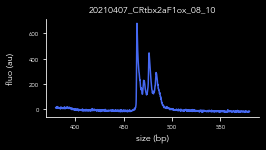

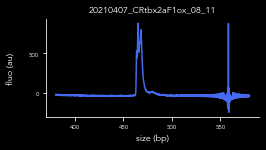

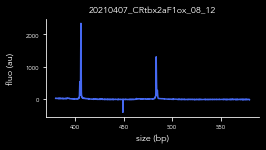

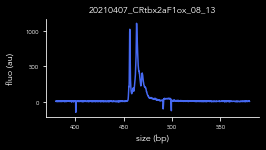

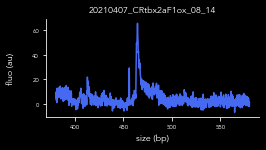

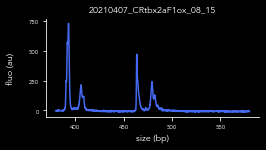

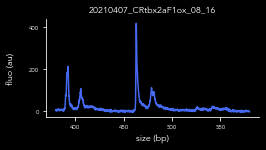

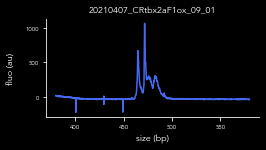

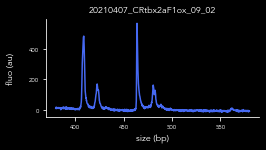

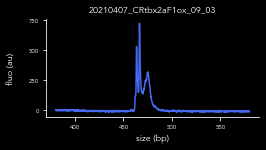

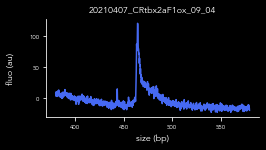

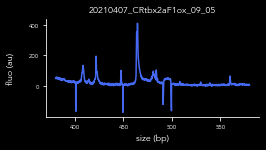

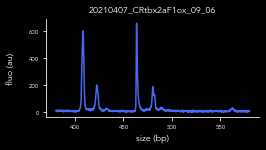

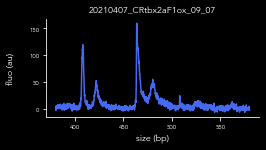

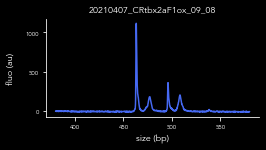

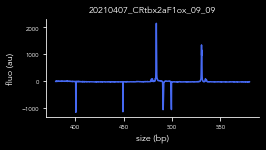

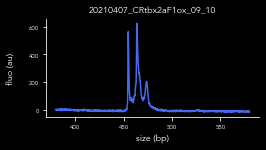

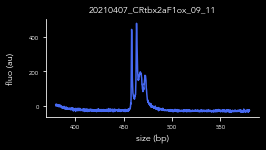

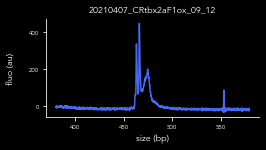

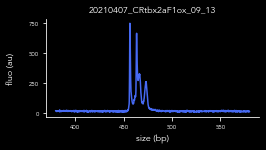

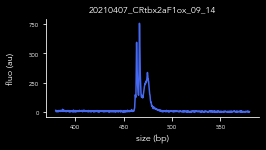

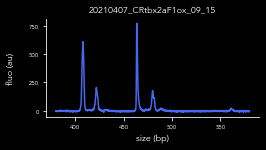

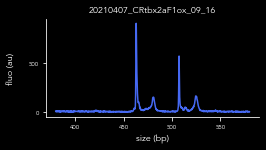

In [7]:
dPath = "/Users/angueyraaristjm/Documents/LiMolec/zfGenotyping/20210407_tbx2aF1s/tbx2a/" #directory path
%cd $dPath
gene = 'tbx2a'

fcsvs = !ls *.csv;
for file in fcsvs:
    fPath = file[:-4] #file path
    gdf = pd.read_csv(dPath + fPath + '.csv')
    fH, axH= plotABIcsv(dPath, fPath, gene)
    fH.savefig("./{0}.svg".format(fPath), transparent=False, format="svg")
    #     fH.savefig("./{0}.svg".format(fPath[:-4]), transparent=True, format="svg")

In [ ]:
#pyplot version (Sep_2019)
plotname = ''
fH, ax = plt.subplots()
pH1 = plt.plot(gdf['size'],gdf['fluo'])
pH2 = plt.plot(gdf['size'],gdf['ladder'])
plt.xlim(150,300)
# plt.ylim(0,1000)
plt.tight_layout()

In [ ]:
# # Sparkline plots
# genename = 'syt5b'
# n,h = plotBars(genename)
# fH, ax = plt.subplots(figsize=[2.25,.25])
# ax.axhline(y = np.mean(h), color = 'white', linewidth = .2, alpha = 1, solid_capstyle='butt', zorder = 0)
# pH = ax.bar(n, h, width=.8, bottom=None, align='center', data=None, color=pC['plt'], zorder = 1)
# ax.text(.90, 1, genename,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=7, zorder = 0)
# ax.text(.97, 0.2, (np.around(np.mean(h),decimals=0)),horizontalalignment='left',verticalalignment='top',transform=ax.transAxes, fontsize=6, zorder = 0)
# ax.set_axis_off()
# plt.savefig("./resources/{0}.svg".format(genename), transparent=True, format="svg")